In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing

#time = 10 #sec
slot = 10000
sensores = 4


data = np.ones((slot, sensores))

data = np.transpose(np.array([np.random.normal(0, 8, slot), 
                                    np.random.normal(26.52, 12, slot),
                                    np.random.normal(84.58, 5, slot),
                                    np.random.normal(100, 5, slot)]))

data = preprocessing.normalize(data)

print(data.shape)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(10000, 4)


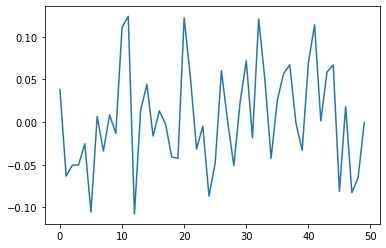

In [2]:
plt.plot(data[:50,0]) #out_pressure

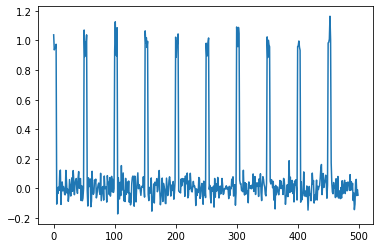

In [3]:
N = 500 # sample count
P = 50  # period
D = 5   # width of pulse
sig = np.arange(N) % P < D

signal = sig + data[:500, 0]

plt.plot(signal)

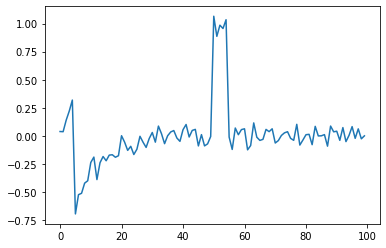

In [11]:
#ramp


sig_linear = np.arange(0, 100, 1)

sig_exp = -0.9**np.arange(0, 100, 1)

signal = sig[:100] + data[:100, 0] + sig_exp

plt.plot(signal)

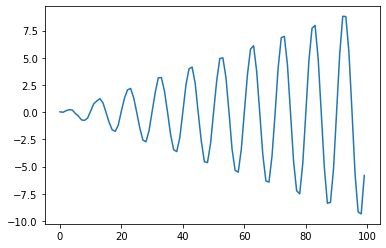

In [5]:
T = 10

f = 1/T

t = np.arange(0 , T, f)


A = t



carrier = A*np.sin(2*np.pi*t)

carrier = data[:len(carrier), 0] + carrier

plt.plot(carrier)

In [ ]:
class SinteticSignal: